# Predict Housing Prices using Kaggle Dataset

## Competition Description


Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

## Acknowledgments
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

## Contents
1. import basic packages
2. make sure data is in local dir and upload it
3. explore data, explore features. Note which need to be manipulated
4. test machine models

In [44]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Data Exploration and Wrangling

In [45]:
print(os.getcwd())
DIR = 'D:\GitHub\Kaggle_problems\Predicting_housing_prices'
os.chdir(DIR)
print(os.getcwd())

df = pd.read_csv('train.csv')
df.head()
test = pd.read_csv('test.csv')

D:\GitHub\Kaggle_problems\Predicting_housing_prices
D:\GitHub\Kaggle_problems\Predicting_housing_prices


In [46]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


This data is very inclusive, and has 79 features. While we could try to just one-hot encode I'm not sure thats the best way to handle this. I feel like a lot of these features should be target encoded. My fear with this is that we're over fitting to the sale data - so we should do this only on a few features AFTER we've split our training data for validation data. 

So I want to target encode a few features, and then I want to probably combine some features. Since we've got 79 features, I'll create a feature_map.txt and place this in the directory. There I'll explain which features are being converted to what, and which are being left alone. However, all (en)coding/conversion will be shown here. 

From the feature/data description some questions were raised. Below I'll list out the questions and then we'll try to answer them with visualizations/data

1. neighborhoods vs saleprice, neighborhood vs zoning 
    combine neighborhood and zoning, then use target encoding on these
2. 'Housestyle' vs 'BldgType' vs 'MSSubClass' - these are all linked, do they have the same count/distribution? Can we neglect one of these (If they look the same, we're double counting this info... - can we combine them?)
    Combine, then target
3. Nans in Condition2 and in Exterior2nd? Also Look at combinations of Condition1,2 Exterior1,2
    Combine Conditions and Exteriors, then count encode
4. MasVnrArea - can we break this down into categories, does it matter what the MasVnrType is?
    Target encode
5. Look at OverallQual, OverallCond, ExterQuality, ExterCond - these are the same thing? Can we combine these?
    Can't combine these easily, but lets change ExterQuality and ExterCond to numbers
6. Count Plot of heating and HeatngQC
7. Look at Functional - we know we want typical to be good - everything else bad...
8. Fireplaces vs FireplaceQu
9. GarageYrBlt vs YearBuilt and Garagetype
10. GarageCars/GarageArea/GarageQual
11. WoodDeckSf,OpenPorchSf,EnclosedPorch,3SsnPorch vs saleprice (scatter)
12. MiscFeature and MiscVal
13. MoSold,YrSold
14. SaleType,SaleCondition


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

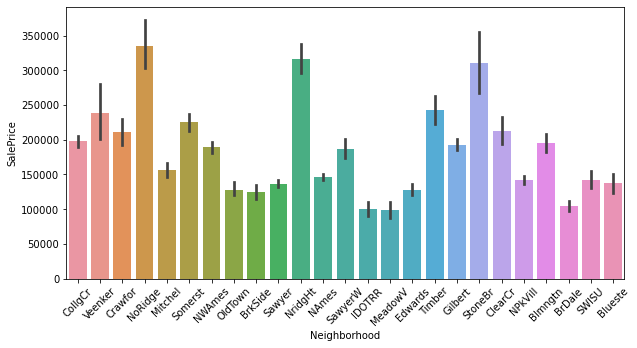

In [47]:
#print(df.groupby(['Neighborhood','MSZoning']).Neighborhood.count())
#print(df.groupby(['Neighborhood']).SalePrice.mean())
#print(df.groupby(['Neighborhood','MSZoning']).SalePrice.mean())
plt.figure(0,figsize=(10,5))
sns.barplot(x = 'Neighborhood', y = 'SalePrice', data = df)
plt.xticks(rotation = 45)

<AxesSubplot:xlabel='MasVnrType', ylabel='SalePrice'>

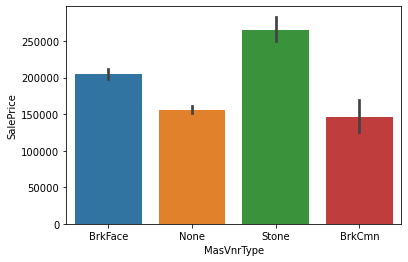

In [48]:
plt.figure(1)
sns.barplot(x='MasVnrType',y = 'SalePrice', data = df)

<AxesSubplot:xlabel='ExterCond', ylabel='SalePrice'>

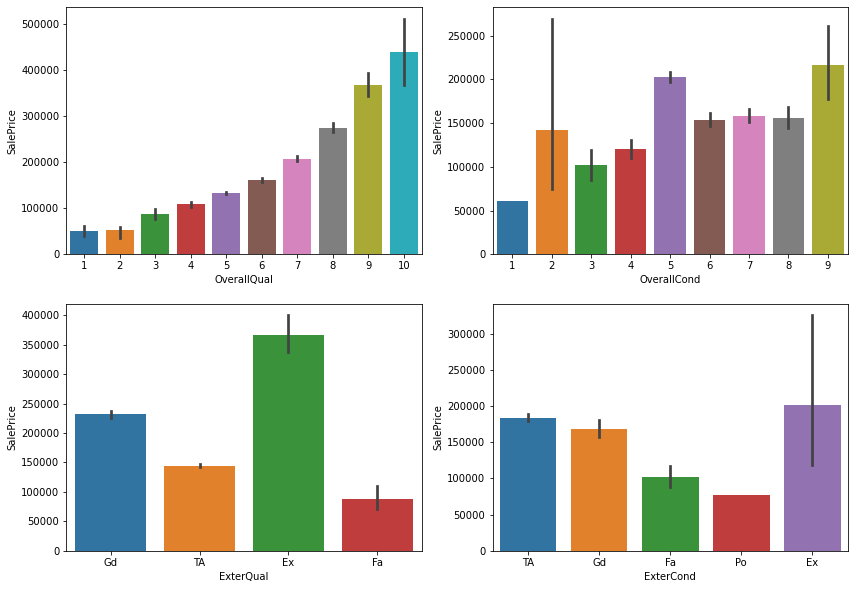

In [49]:
plt.figure(2,figsize=(14,10))

plt.subplot(2,2,1)
sns.barplot(x='OverallQual',y='SalePrice', data = df)
plt.subplot(2,2,2)
sns.barplot(x='OverallCond',y='SalePrice', data = df)
plt.subplot(2,2,3)
sns.barplot(x='ExterQual',y='SalePrice', data = df)
plt.subplot(2,2,4)
sns.barplot(x='ExterCond',y='SalePrice', data = df)


<AxesSubplot:xlabel='ExterQual', ylabel='SalePrice'>

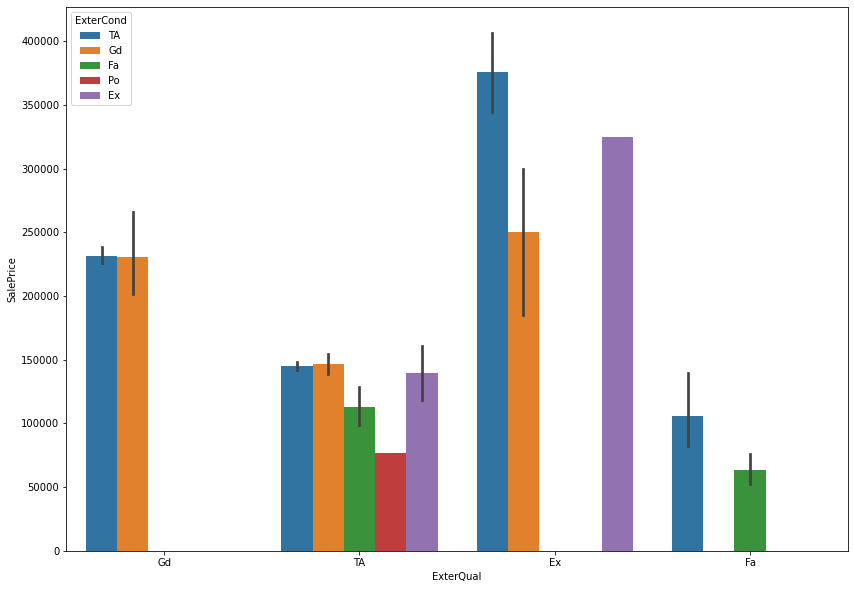

In [50]:
plt.figure(3,figsize=(14,10))

sns.barplot(x='ExterQual',y='SalePrice', hue ='ExterCond', data = df)


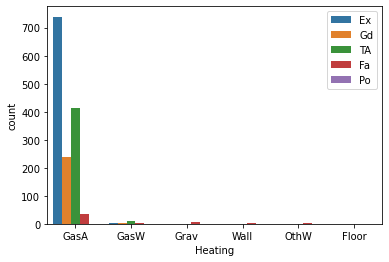

In [51]:
plt.figure(4)
sns.countplot(x = 'Heating',hue='HeatingQC',data = df)
plt.legend(loc = 1)

(10.0, 800.0)

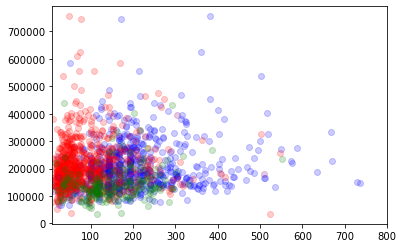

In [52]:
plt.figure(5)
plt.scatter(df.WoodDeckSF,df.SalePrice,c='b',alpha=0.2)
plt.scatter(df.OpenPorchSF,df.SalePrice,c='r',alpha=0.2)
plt.scatter(df.EnclosedPorch,df.SalePrice,c='g',alpha=0.2)
plt.scatter(df['3SsnPorch'],df.SalePrice,c='purple',alpha=0.2)
plt.xlim([10,800])
#,EnclosedPorch,3SsnPorch vs saleprice (scatter)

I've explored the data and I've decided this time around I'll keep the vast majority of these features and will follow the transformations discussed in feature_maps.txt. After data wrangling and model building, I'll do two more excercises 1 with features I've created by trying to combine some features here, and one by reducing the features of whichever the first two models functions better. 

## Data Wrangling/Feature Selection

First we need to double check all our catagorical datas (object) and then encode them. 

In [53]:
df.isna().sum().sum()

6965

Loooking at the non-null values... I'm going to exclude everything with less than 700 non-null values. This is approximately 50% and choosen at random

In [54]:
y = df['SalePrice']
df.drop(['Id','Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature','SalePrice'],axis = 1, inplace = True)
test.drop(['Id','Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'],axis = 1, inplace = True)

cat_columns = df.select_dtypes(include = [object]).columns
print(cat_columns)
for column in df.columns:
    if column in cat_columns:
        df[column].fillna('Undefined',inplace = True)
        test[column].fillna('Undefined', inplace = True)
    else:
        df_mean = df[column].mean()
        df[column].fillna(df_mean,inplace = True)
        test[column].fillna(df_mean,inplace = True)


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [55]:
train = df.copy() 
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoder.fit(train[cat_columns]);
one_hot_columns = encoder.get_feature_names(list(cat_columns))
train_one_hot = pd.DataFrame(encoder.transform(train[cat_columns]), columns=one_hot_columns)
test_one_hot = pd.DataFrame(encoder.transform(test[cat_columns]), columns=one_hot_columns)

train.drop(columns=cat_columns, axis=1, inplace=True)
test.drop(columns=cat_columns, axis=1, inplace=True)

train[train_one_hot.columns] = train_one_hot
test[train_one_hot.columns] = test_one_hot


In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(train)
train = pd.DataFrame(scaler.transform(train), columns=train.columns)
test = pd.DataFrame(scaler.transform(test), columns=test.columns)

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


In [15]:
x_train,x_valid,y_train,y_valid = train_test_split(train,y, random_state = 100)
model_1 = RandomForestClassifier(n_estimators = 100,max_depth = 20, random_state = 100)
model_1.fit(x_train,y_train)
pred_1_y = model_1.predict(x_valid)
mae_1 = mean_squared_error(y_valid,pred_1_y)

print('The mae for the random forest model with all features is ',mae_1)
print(mae_1/1460)

The mae for the random forest model with all features is  1922238663.939726
1316601.8246162508


In [132]:
trees = [(1+i)*10 for i in range(51)]
leafs = [(1+i)*5 for i in range(25)]

best_mae = 999999999999
for tree in trees:
    for leaf in leafs:
        print(leaf,tree)
        rf_cv_model = RandomForestClassifier(n_estimators = tree, max_depth = leaf, random_state = 100)
        model2.fit(x_train,y_train)
        pred2 = model2.predict(x_valid)
        mae2 = mean_squared_error(y_valid,pred2)
        if mae2 < best_mae:
            best_mae = mae2
            best_tree = tree
            best_leaf = leaf
            print('Best Tree', tree, 'Best leaf', leaf, 'best mae', best_mae)
print('done')

Best Tree 10 Best leaf 5 best mae 4905451787.169863
Best Tree 10 Best leaf 10 best mae 4179674141.578082
Best Tree 10 Best leaf 15 best mae 3220176142.421918
Best Tree 10 Best leaf 20 best mae 2880762483.052055
Best Tree 20 Best leaf 15 best mae 2699933101.1643834
Best Tree 20 Best leaf 20 best mae 1980902873.6438355
Best Tree 40 Best leaf 25 best mae 1799784285.117808
Best Tree 60 Best leaf 20 best mae 1791900670.369863
Best Tree 60 Best leaf 30 best mae 1785301930.7150686
Best Tree 60 Best leaf 50 best mae 1744115864.2931507
Best Tree 70 Best leaf 30 best mae 1578868643.210959
Best Tree 100 Best leaf 25 best mae 1577310716.1917808
Best Tree 180 Best leaf 35 best mae 1572956766.2849314
Best Tree 190 Best leaf 25 best mae 1563556867.879452
Best Tree 200 Best leaf 35 best mae 1492378147.038356
Best Tree 210 Best leaf 35 best mae 1488554337.5369864
Best Tree 240 Best leaf 35 best mae 1410263404.0438356
Best Tree 250 Best leaf 35 best mae 1379178251.989041
Best Tree 360 Best leaf 35 best 

In [17]:

model2 = RandomForestClassifier(n_estimators = best_tree, max_depth = best_leaf, random_state = 100)
model2.fit(train,y)
pred2 = model2.predict(test)

from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor(random_state=1, n_estimators=200, min_samples_split=3)
model.fit(x_train, y_train)
mae_2 = mean_squared_error(y_valid,model.predict(x_valid))
print(mae_2, mae_2/1460)

model = GradientBoostingRegressor(random_state=1, n_estimators=200, min_samples_split=3)
model.fit(train, y)
pred = model.predict(test)



746333952.4590608 511187.6386705896


In [138]:
predictions = np.zeros([len(test),2])
predictions[:,0] = model2.predict(test)
predictions[:,1] = model.predict(test)

In [24]:
n_est = [(1+i)*10 for i in range(50)]
min_split = [3, 5, 7]
mae_gb = 999999999999
for n in n_est:
    for ms in min_split:
        print('n is ',n,' and min split is ',ms)
        model = GradientBoostingRegressor(random_state=1, n_estimators=n, min_samples_split=ms)
        model.fit(x_train, y_train)
        thresh = mean_squared_error(y_valid,model.predict(x_valid))
        if thresh < mae_gb:
            best_n = n
            best_ms = ms
            mae_gb = thresh
            print('Best n currently is ',best_n,' best split is ',best_ms, 'for a mae of ',mae_gb)
print('done')

n is  10  and min split is  3
Best n currently is  10  best split is  3 for a mae of  2339000883.0274744
n is  10  and min split is  5
Best n currently is  10  best split is  5 for a mae of  2337577208.0773325
n is  10  and min split is  7
n is  20  and min split is  3
Best n currently is  20  best split is  3 for a mae of  1361289217.2228274
n is  20  and min split is  5
Best n currently is  20  best split is  5 for a mae of  1334134223.5872598
n is  20  and min split is  7
n is  30  and min split is  3
Best n currently is  30  best split is  3 for a mae of  1050247361.0858662
n is  30  and min split is  5
Best n currently is  30  best split is  5 for a mae of  1032913184.1001331
n is  30  and min split is  7
n is  40  and min split is  3
Best n currently is  40  best split is  3 for a mae of  910373196.1788886
n is  40  and min split is  5
n is  40  and min split is  7
n is  50  and min split is  3
Best n currently is  50  best split is  3 for a mae of  860357851.0544748
n is  50  an

In [64]:
from sklearn.model_selection import cross_validate

rf_cv_model = RandomForestClassifier(random_state=1, n_estimators = best_tree, max_depth = best_leaf)
cv = cross_validate(rf_cv_model,train,y, cv = 5)
print(cv['test_score'])
print(cv['test_score'].mean())


C:\Users\wolfg\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[0.01712329 0.00684932 0.02739726 0.00684932 0.00342466]
0.012328767123287671


In [66]:
best_n = 470
best_ms = 5
gb_cv_model = GradientBoostingRegressor(random_state=1, n_estimators=n, min_samples_split=ms)
cv_gb = cross_validate(gb_cv_model,train, y, cv = 5)
print(cv_gb['test_score'])
print(cv_gb['test_score'].mean())

[0.90966909 0.86111395 0.90100577 0.89536627 0.88610517]
0.8906520504153909


(1460, 281)